Predicted weights are:  [0.3243242475339642, 0.3243242475339642]


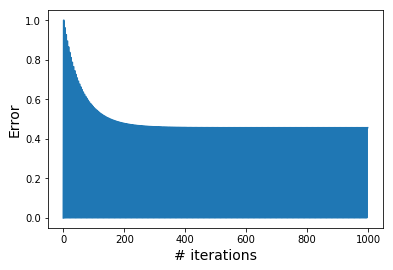

In [179]:
import numpy as np
from operator import add
import matplotlib.pyplot as plt

#---------------------- Initialization --------------------------
# Initializing random input from (-0.5, 0.5)
X = [[0, 0], [0, 1], [1, 0], [1, 1]]
output = [0, 1, 1, 0]
num_iterations = 1000
mu = 0.01
# Initializing random weights between (0, 1)
predicted_weights = [0, 0]
errors = []

#---------------------- LMS Algorithm ---------------------------
for index in range(0, num_iterations):
    x = X[(index) % len(output)]
    actual_output = output[(index) % len(output)]
    predicted_output = sum(i[0] * i[1] for i in zip(x, predicted_weights))
        
    d = np.sum(actual_output)
    e = np.sum(predicted_output)
    
    errors.append(abs(d - e) * abs(d - e))
        
    x = [2.0 * i * mu * (d - e) for i in x]
    
    predicted_weights = list(map(add, predicted_weights, x))    

plt.plot(errors)
plt.xlabel('# iterations', fontsize=14, color='black')
plt.ylabel('Error', fontsize=14, color='black')

print("Predicted weights are: ", predicted_weights)

[[129891.      0.]
 [     0. 129891.]]
Predicted weights are:  [[0.9994858 ]
 [0.99999228]]


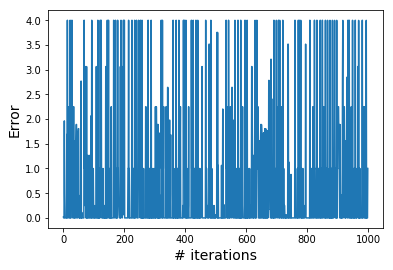

In [180]:
import numpy as np
from operator import sub
import matplotlib.pyplot as plt

#---------------------- Initialization --------------------------
# Initializing random input from (-0.5, 0.5)
X = [[0, 0], [0, 1], [1, 0], [1, 1]]
output = [0, 1, 1, 0]
num_iterations = 1000
# Initializing random weights between (0, 1)
predicted_weights = np.matrix(np.random.randn(2))
predicted_weights = predicted_weights.transpose()
errors = []
eta = 129891
R_k_inverse = eta * np.identity(len(X[0]))

print(R_k_inverse)

#---------------------- RLS Algorithm ---------------------------
for index in range(0, num_iterations):
    rr = np.random.randint(1000)
    x = np.matrix(X[(index + rr) % len(output)])
    x = x.transpose()
    actual_output = output[(index + rr) % len(output)]
    predicted_output = predicted_weights.transpose() * x
    
#     print(x, actual_output)
    
    error = actual_output - predicted_output
        
    errors.append(np.sum(error) * np.sum(error))
    
    Z_k = R_k_inverse * x
    
    q = x.transpose() * Z_k
    
    v = 1 / (1 + q)
    
    Z_k_cap = np.multiply(v,  Z_k)
    
#     print(predicted_weights, np.multiply(error, Z_k_cap))
    
    predicted_weights = predicted_weights + np.multiply(error, Z_k_cap)
    
    R_k_inverse = R_k_inverse - Z_k_cap * Z_k_cap.transpose() 

plt.plot(errors)
plt.xlabel('# iterations', fontsize=14, color='black')
plt.ylabel('Error', fontsize=14, color='black')

print("Predicted weights are: ", predicted_weights)